In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("debate_twitter_train.csv")

In [6]:
data.dtypes.value_counts()

float64    16
object     12
int64       1
dtype: int64

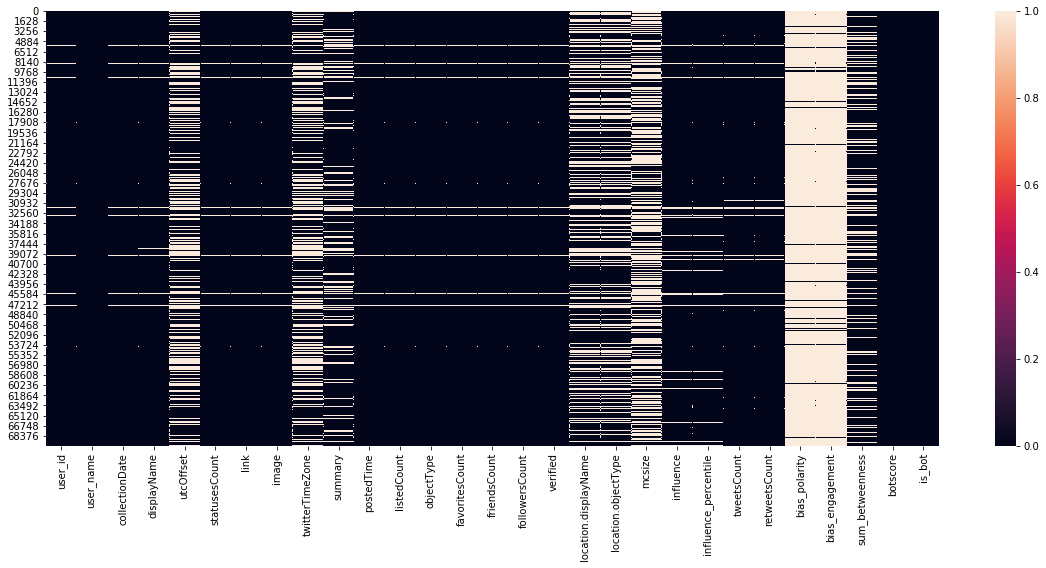

In [12]:
plt.figure(figsize=(20,8))

sns.heatmap(data.isnull())
plt.show()

### Features to Potentially Remove

- utc offset - related to twittertimezone

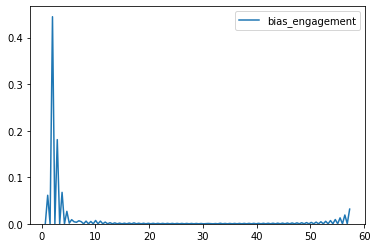

In [31]:
sns.kdeplot(data.bias_engagement, bw=0.1)

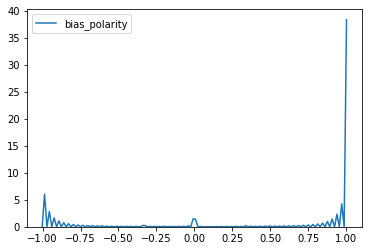

In [34]:
sns.kdeplot(data.bias_polarity, bw=0.001)

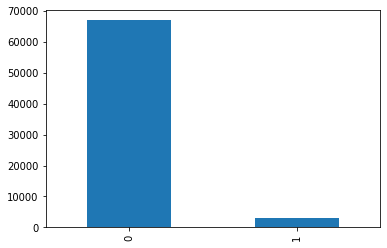

In [26]:
data.is_bot.value_counts().plot(kind='bar')

In [88]:
df = data.select_dtypes('number')

In [98]:
X_ = df.drop(['botscore', 'is_bot'], axis=1)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(fill_value = 'mean')
X = imputer.fit_transform(X_)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [100]:
y = df.botscore

# Build model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = Ridge()

# Train the model
model.fit(X, y)

# Make Predictions
y_pred = model.predict(X)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(rmse)

0.1167151764843776


In [72]:
# Define input features and target variable

def build_lr(X, y):
    # X
    y = df.botscore

    # Build model
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()

    # Train the model
    model.fit(X, y)

    # Make Predictions
    y_pred = model.predict(X)

    # Evaluate the model
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    print(rmse)

In [73]:
build_lr(X, y)

0.11712136196097367


In [93]:
X_ = df.drop(['botscore', 'is_bot'], axis=1)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(fill_value = 'mean')
X = imputer.fit_transform(X_)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [94]:
# Define input features and target variable
# X
y = df.is_bot

# Build model
from sklearn.linear_model import LinearRegression, LogisticRegression
model = LogisticRegression()

# Train the model
model.fit(X, y)

# Make Predictions
y_pred = model.predict(X)

# Evaluate the model
from sklearn.metrics import mean_squared_error, balanced_accuracy_score
b_acc = balanced_accuracy_score(y, y_pred)

print(b_acc)

0.5186288501823098


In [103]:
# One Hot Encoding / Dummy Variables

# Label Encoding

# Target Encoding


Eastern Time (US & Canada)    12779
Central Time (US & Canada)     8470
Pacific Time (US & Canada)     7916
Quito                          2629
Atlantic Time (Canada)         2574
                              ...  
Africa/Blantyre                   1
IST                               1
America/Lima                      1
Asia/Kolkata                      1
Europe/Belgrade                   1
Name: twitterTimeZone, Length: 189, dtype: int64

In [146]:
# Data Preprocessing
df = data.select_dtypes('number')
X_ = df.drop(['botscore', 'is_bot'], axis=1)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(fill_value = 'mean')
X = imputer.fit_transform(X_)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

ttz = data[['twitterTimeZone']]

cat_imputer = SimpleImputer(strategy = 'most_frequent')
ttz = cat_imputer.fit_transform(ttz)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# l_encoder = LabelEncoder()
# ttz = l_encoder.fit_transform(ttz.ravel())

oh_encoder = OneHotEncoder(sparse=False)
ttz = oh_encoder.fit_transform(ttz)

In [148]:
X_cat = np.concatenate((X, ttz), axis=1)
y = df.botscore

# Build model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = Ridge()

# Train the model
model.fit(X_cat, y)

# Make Predictions
y_pred = model.predict(X_cat)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(rmse)

0.1166601832704021


In [155]:
# Data Preprocessing
df = data.select_dtypes('number')
X_ = df.drop(['botscore', 'is_bot'], axis=1)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(fill_value = 'mean')
X = imputer.fit_transform(X_)

ttz = data[['twitterTimeZone']]

cat_imputer = SimpleImputer(strategy = 'most_frequent')
ttz = cat_imputer.fit_transform(ttz)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# l_encoder = LabelEncoder()
# ttz = l_encoder.fit_transform(ttz.ravel())

oh_encoder = OneHotEncoder(sparse=False, drop='first')
ttz = oh_encoder.fit_transform(ttz)
X_cat = np.concatenate((X, ttz), axis=1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_cat)

In [159]:
# Define input features and target variable
# X
y = df.is_bot

# Build model
from sklearn.linear_model import LinearRegression, LogisticRegression
model = LogisticRegression(solver='newton-cg')

#sag', 'saga' and 'newton-cg'

# Train the model
model.fit(X, y)

# Make Predictions
y_pred = model.predict(X)

# Evaluate the model
from sklearn.metrics import mean_squared_error, balanced_accuracy_score
b_acc = balanced_accuracy_score(y, y_pred)

print(b_acc)

0.5202303152736166


In [162]:
from category_encoders import TargetEncoder

ttz = data[['twitterTimeZone']]

target_encoder = TargetEncoder()
ttz = target_encoder.fit_transform(ttz)

In [170]:
# Data Preprocessing
df = data.select_dtypes('number')
X_ = df.drop(['botscore', 'is_bot'], axis=1)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(fill_value = 'mean')
X = imputer.fit_transform(X_)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_cat)

ttz = data[['twitterTimeZone']]

cat_imputer = SimpleImputer(strategy = 'most_frequent')
ttz = cat_imputer.fit_transform(ttz)

target_encoder = TargetEncoder()
ttz = target_encoder.fit_transform(ttz, y)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# l_encoder = LabelEncoder()
# ttz = l_encoder.fit_transform(ttz.ravel())

oh_encoder = OneHotEncoder(sparse=False, drop='first')
ttz = oh_encoder.fit_transform(ttz)
X_cat = np.concatenate((X, ttz), axis=1)

In [171]:
# Define input features and target variable
# X
y = df.is_bot

# Build model
from sklearn.linear_model import LinearRegression, LogisticRegression
model = LogisticRegression(solver='newton-cg')

#sag', 'saga' and 'newton-cg'

# Train the model
model.fit(X, y)

# Make Predictions
y_pred = model.predict(X)

# Evaluate the model
from sklearn.metrics import mean_squared_error, balanced_accuracy_score
b_acc = balanced_accuracy_score(y, y_pred)

print(b_acc)

0.5190831504096376
